In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# ***TEAM PARIS - CAPSTONE PROJECT***

# _CUSTOMER CHURN PREDICTION PROJECT_

# **Backgrond / Introduction**

This project is for an African telecommunications company (Expresso) that provides customers with airtime and mobile data bundles. The objective of this project is to develop a machine learning model to predict the likelihood of each customer ***“churning,”*** i.e. becoming inactive and not making any transactions for 90 days.

This solution will help this telecom company to better serve their customers by understanding which customers are at risk of leaving.

# **Business Understanding**
The goal of this is to develop a predictive model that determines the likelihood for a customer to churn - to stop purchasing airtime and data from the client.

This project aims to throw more light on the churn rate of the customer, the reasons for churn and possible ways to avert more customers from churning and improve the customer attrition.

The evaluation metric for this project is Area Under the Curve (AUC).
The values can be between 0 and 1, inclusive. Where 1 indicates the customer churned and 0 indicates the customer stayed with Expresso.

This project is to predict the likelihood customers who will churn. Deployment will be via Graio or Streamlit with the model integrated into an API (Application Programme Interface) using FastAPI

# **Data Understanding**

The data describes 1.5 million clients split into two data sets: _"Train.csv"_ and _"Test.csv"_

**_user_id_** - User Identification

**_REGION_** -  The location of the user

**_TENURE_** -  Duration the user has spent on the network (in months)

**_MONTANT_** - The top-up amount

**_FREQUENCY_RECH_** - The number of times the customer has refilled

**_REVENUE_** -   Monthly income of customers

**_ARP_SEGMENT_** -   Income over 90 days / 3

**_FREQUENCE_** - The number of times the client has made an income

**_DATA_VOLUME_** - The number of connections

**_ON_NET_** -  Inter expresso call

**_ORANGE_** -  The number of calls to Orange network

**_TIGO_** -  The number of calls to Tigo network

**_ZONE1_** -   Calls to zone 1

**_ZONE2_** -   Calls to zone 2

**_MRG_** -   A customer who is going

**_REGULARITY_** - Number of times a customer is active for 90 days

**_TOP_PACK_** - Most active packs

**_FREQ_TOP_PACK_** - Number of times the customer activated the top pack packages

**_CHURN_** - Target variable to predict


# **Hypothesis and Questions**

***Hypothesis 1***

***Null Hypothesis (H0)***: There is no relationship between the monthly top-up and churn.

***Alternate Hypothesis (H1):*** There is a relationship between the monthly top-up and churn.


**Hypothesis 2**

***Null Hypothesis:*** There is no relationship between Income of clients and the number of times they refilled

***Alternate Hypothesis:*** There is a relationship between Income of clients and the number of times they refilled



***Questions***

**Univariate Analysis**

1. How many times did the customers refill?
2. What package has the most top-ups?
3. What location has the most customers?
4. What is the churn distribution of the customers?
5. What tennure has the highest number of subscribers?
6. Do customers with high income make the most top-ups?
7. What region makes the most top-ups?
8. Which network has the most interactions/transactions?
9. Which location has the highest number of network transactions?
10. Which month/tenure has the highest amount of top-up?

**Bivariate Analysis**

11. How many customers make on-net calls and off-net calls?
12. What is the ratio of calls customers made to Orange and Tigo?
13. What is the churn distribution by Expresso, Tigo, and Orange?
14. Which customers churned by top-up amount and income?
15. Which location has the highest number of top earners?
16. What is the highest amount of active users for 90 days?

**Multivariate Analysis**
17. What is the relationship between network interactions and customer churn?
18. What is the relationship between top-up amount, refill and customer income?
19. How does the top-up amount affect the top packages and their churn rate?
20. What is the relationship between 'CHURN,' 'TENURE,' and 'REVENUE.

### **Importing all relevant libraries and packages**

In [2]:
# Data Manipuulation
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,precision_score, recall_score, fbeta_score, make_scorer, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import GridSearchCV, cross_validate

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score,roc_curve

#from skopt import BayesSearchCV
from sklearn.utils import class_weight

import scipy.stats as stats

# models
from sklearn import svm
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier




from imblearn.over_sampling import  RandomOverSampler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold





# model interpretation
#import shap
import joblib
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the Train dataset
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Azubi capstone/capstone/Train.csv')
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [4]:
# Load the Test dataset
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Azubi capstone/capstone/Test.csv')
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


# **Overview of Dataset**

In [5]:
# Listing the columns in the Train data
train.columns.to_list()

['user_id',
 'REGION',
 'TENURE',
 'MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'MRG',
 'REGULARITY',
 'TOP_PACK',
 'FREQ_TOP_PACK',
 'CHURN']

In [6]:
# Checking the shape of the Train data
train.shape

(1077024, 19)

>- **The dataset has 1077024 rows and 19 columns**

In [7]:
# Checking the shape of the Test data
test.shape

(190063, 18)

>- **Notice the test data has 18 columns, one, less than the train data. This is
because the target variable "Churn" is not present.**

In [8]:
# Listing the columns in the Test data
test.columns.to_list()

['user_id',
 'REGION',
 'TENURE',
 'MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'MRG',
 'REGULARITY',
 'TOP_PACK',
 'FREQ_TOP_PACK']

In [9]:
# Checking more information about the Train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

>- **With the exception of the "user_id" column, there are 4 categorical variables and 14 numerical variabeles**

In [10]:
# Checking more information about that test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [11]:
# Checking summary statistics of the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


>- **From the summary statistics, the mean monthly top-up is 5529.2 and almost 50% of that was spent on activites made on the expresso network with a mean of 277.06 for on_net activity.**

## **Check the correlation between the various columns**

In [12]:
# Find the correlation between the columns
corr_matrix = train.corr()
corr_matrix

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.791875,0.976696,0.976696,0.776145,0.307393,0.324712,0.656019,0.409970,0.374499,0.421718,0.522629,0.740936,-0.105110
FREQUENCE_RECH,0.791875,1.000000,0.798738,0.798737,0.955882,0.158125,0.403519,0.519295,0.341645,0.116630,0.125633,0.558206,0.869419,-0.123849
REVENUE,0.976696,0.798738,1.000000,1.000000,0.786208,0.313408,0.329744,0.659143,0.408489,0.384992,0.390504,0.532299,0.751271,-0.114401
ARPU_SEGMENT,0.976696,0.798737,1.000000,1.000000,0.786207,0.313408,0.329744,0.659144,0.408489,0.384992,0.390504,0.532297,0.751270,-0.114402
FREQUENCE,0.776145,0.955882,0.786208,0.786207,1.000000,0.174710,0.392982,0.472755,0.305933,0.110514,0.142466,0.591730,0.845926,-0.139982
DATA_VOLUME,0.307393,0.158125,0.313408,0.313408,0.174710,1.000000,-0.014208,0.061651,0.022279,0.037533,0.044698,0.187996,0.123775,-0.033699
ON_NET,0.324712,0.403519,0.329744,0.329744,0.392982,-0.014208,1.000000,0.219325,0.135288,0.004170,-0.014595,0.269578,0.354593,-0.058102
ORANGE,0.656019,0.519295,0.659143,0.659144,0.472755,0.061651,0.219325,1.000000,0.400364,0.050091,0.031593,0.311036,0.553373,-0.064132
TIGO,0.409970,0.341645,0.408489,0.408489,0.305933,0.022279,0.135288,0.400364,1.000000,0.013983,0.026644,0.192935,0.369987,-0.035993
ZONE1,0.374499,0.116630,0.384992,0.384992,0.110514,0.037533,0.004170,0.050091,0.013983,1.000000,0.042970,0.045154,0.190099,0.009309


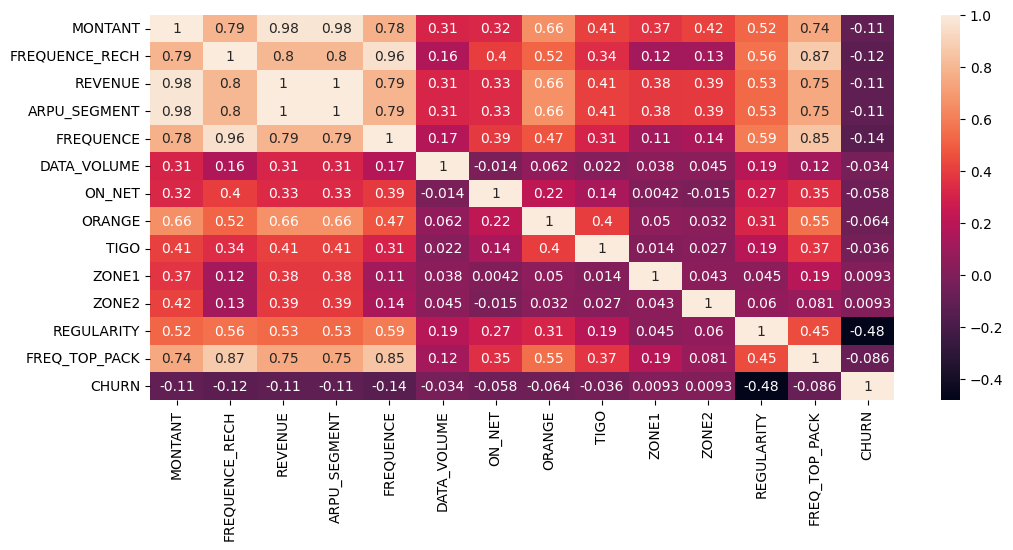

In [13]:
# Plot a heatmap for the correlations
plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show();

In [14]:
 # get the minimum value
min_corr = corr_matrix.min().min()
# get the columns involved
min_corr_cols = corr_matrix.unstack().idxmin()

print('The minimum correlation was:', min_corr)
print('The columns involved are:', min_corr_cols)

The minimum correlation was: -0.47974568648386706
The columns involved are: ('REGULARITY', 'CHURN')


In [15]:
# get the minimum value
max_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
            .max().max())

# get the maximum value (excluding same columns)
# get the columns involved
max_corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
                 .stack().idxmax())

print('The maximun correlation was:', max_corr)
print('The columns involved are:', max_corr_cols)

The maximun correlation was: 0.9999999933584335
The columns involved are: ('REVENUE', 'ARPU_SEGMENT')


>- **The lowest correlation is -0.47974568648386706 between REGULARITY and CHURN.**

>- **The highest correlation is 0.9999999933584335 between REVENUE and ARPU_SEGMENT**

In [16]:
# Checking for missing/null values in the Train data
train.isna().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [17]:
# Checking for missing/null values in the Test data
test.isna().sum()

user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

In [18]:
# Calculate the total number of rows in the Train dataset
total_rows = train.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = (train.isnull().sum() / total_rows) * 100

# Format the output to display two decimal places
missing_percentage_formatted = missing_percentage.round(2)

print("Percentage of Missing Values for Each Column in the Train Data:")
print(missing_percentage_formatted)


Percentage of Missing Values for Each Column in the Train Data:
user_id            0.00
REGION            39.40
TENURE             0.00
MONTANT           35.09
FREQUENCE_RECH    35.09
REVENUE           33.64
ARPU_SEGMENT      33.64
FREQUENCE         33.64
DATA_VOLUME       49.19
ON_NET            36.51
ORANGE            41.52
TIGO              59.87
ZONE1             92.12
ZONE2             93.61
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.86
FREQ_TOP_PACK     41.86
CHURN              0.00
dtype: float64


>- We can observe from the above cell that most of the columns have missing values of high magnitude with Zone1 and Zone2 having the highest perentage of missing values, at 92.12% and 93.61% repectively.

In [19]:
# Calculate the total number of rows in the Test dataset
total_rows_test = test.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage_test = (test.isnull().sum() / total_rows_test) * 100

# Format the output to display two decimal places
missing_percentage_test_formatted = missing_percentage_test.round(2)

print("Percentage of Missing Values for Each Column in The Test Data:")
print(missing_percentage_test_formatted)


Percentage of Missing Values for Each Column in The Test Data:
user_id            0.00
REGION            39.32
TENURE             0.00
MONTANT           34.92
FREQUENCE_RECH    34.92
REVENUE           33.48
ARPU_SEGMENT      33.48
FREQUENCE         33.48
DATA_VOLUME       49.11
ON_NET            36.46
ORANGE            41.38
TIGO              59.72
ZONE1             92.19
ZONE2             93.68
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.72
FREQ_TOP_PACK     41.72
dtype: float64


In [20]:
# Checking for duplicates in the 'train' DataFrame
train_duplicates = train.duplicated().sum()
print("Number of duplicates in train:", train_duplicates)

# Checking for duplicates in the 'test' DataFrame
test_duplicates = test.duplicated().sum()
print("Number of duplicates in test:", test_duplicates)


Number of duplicates in train: 0
Number of duplicates in test: 0


>- **There are no duplicates found in both train and test data**

In [21]:
# Create a function to print the number of unique values in the train data
def print_unique_values(train):
    values = {}
    for col in train.columns:
        number = train[col].nunique()
        print(f'{col}: has {number} of unique values')

In [22]:
print_unique_values(train)

user_id: has 1077024 of unique values
REGION: has 14 of unique values
TENURE: has 8 of unique values
MONTANT: has 4357 of unique values
FREQUENCE_RECH: has 119 of unique values
REVENUE: has 31810 of unique values
ARPU_SEGMENT: has 14062 of unique values
FREQUENCE: has 91 of unique values
DATA_VOLUME: has 32459 of unique values
ON_NET: has 8202 of unique values
ORANGE: has 2674 of unique values
TIGO: has 1105 of unique values
ZONE1: has 482 of unique values
ZONE2: has 394 of unique values
MRG: has 1 of unique values
REGULARITY: has 62 of unique values
TOP_PACK: has 126 of unique values
FREQ_TOP_PACK: has 206 of unique values
CHURN: has 2 of unique values


In [23]:
# Create a function to check if there are zeros in the train data
def number_of_zeros(data):
    for col in data.columns:
        if col != 'Sepssis':
            count = (data[col] == 0).sum()
            print(f'Count of zeros in Column  {col} : {count}')

In [24]:
number_of_zeros(train)

Count of zeros in Column  user_id : 0
Count of zeros in Column  REGION : 0
Count of zeros in Column  TENURE : 0
Count of zeros in Column  MONTANT : 0
Count of zeros in Column  FREQUENCE_RECH : 0
Count of zeros in Column  REVENUE : 0
Count of zeros in Column  ARPU_SEGMENT : 2157
Count of zeros in Column  FREQUENCE : 0
Count of zeros in Column  DATA_VOLUME : 160055
Count of zeros in Column  ON_NET : 53770
Count of zeros in Column  ORANGE : 30806
Count of zeros in Column  TIGO : 47079
Count of zeros in Column  ZONE1 : 29902
Count of zeros in Column  ZONE2 : 20254
Count of zeros in Column  MRG : 0
Count of zeros in Column  REGULARITY : 0
Count of zeros in Column  TOP_PACK : 0
Count of zeros in Column  FREQ_TOP_PACK : 0
Count of zeros in Column  CHURN : 875031


## **Hypothesis Testing**

### Hypothesis 1

In [25]:
# Select the 'MONTANT' (monthly income) and 'CHURN' columns
monthly_top_up = train['MONTANT']
churn = train['CHURN'].astype(int)

# Remove rows with missing values
data = pd.concat([monthly_top_up, churn], axis=1).dropna()

# Perform correlation analysis
correlation, p_value = stats.pearsonr(data['MONTANT'], data['CHURN'])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value > 0.05:
    print('Fail to reject the null hypothesis.')
else:
    print('Reject the null hypothesis.')

Correlation coefficient: -0.10510982376241933
P-value: 0.0
Reject the null hypothesis.


### Hpothesis 2

In [26]:
# Select the 'REVENUE' (monthly income) and 'FREQ_TOP_PACK' columns
monthly_income = train['REVENUE']
top_pack_usage = train['FREQ_TOP_PACK']

# Remove rows with missing values
data = pd.concat([monthly_income, top_pack_usage], axis=1).dropna()

# Perform correlation analysis
correlation, p_value = stats.pearsonr(data['REVENUE'], data['FREQ_TOP_PACK'])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value > 0.05:
    print('Fail to reject the null hypothesis.')
else:
    print('Reject the null hypothesis.')


Correlation coefficient: 0.7512706155082236
P-value: 0.0
Reject the null hypothesis.


***Points to note***

1. Remove Zone 1 nad Zone 2: This may have no impact on our analysis since both columns are almost 100% empty.

2. We need to eliminate MRG means from our analysis, considering it has just one value (NO) which does not provide enough information to work with.

From the above observations, most of the columns have missing values of about (30 to 90)%. Working with these columns may be appropriate since they have a high percentage of missing values. In order to address this, we need to perform a missin value impuutation for these columns.

We will replace these missing vallues with the mean of their respective columns.

In [27]:
# create a functioon to replace the missing values with mean for each respective column in the train data
columns_to_fill = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
                   'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
                   'FREQ_TOP_PACK']

for column in columns_to_fill:
    train[column].fillna(train[column].mean(), inplace=True)


In [28]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,NaN,NaN,NO,3,NaN,9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,NaN,NaN,NO,1,NaN,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.000000,0


In [29]:
# create a functioon to replace the missing values with mean for each respective column in the test data
columns_to_fill = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
                   'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
                   'FREQ_TOP_PACK']

for column in columns_to_fill:
    test[column].fillna(test[column].mean(), inplace=True)


In [30]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.000000,5.00000,2500.000000,833.000000,5.00000,0.000000,64.000000,70.000000,22.95227,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.000000
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,NaN,NaN,NO,2,NaN,9.234326
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,0.000000,281.210613,94.611639,22.95227,NaN,NaN,NO,22,NaN,9.234326
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,NaN,NaN,NO,6,NaN,9.234326
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.000000,7.00000,5637.000000,1879.000000,15.00000,7783.000000,30.000000,24.000000,0.00000,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.000000


In [31]:
# Checking for missing/null values
train.isna().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT                 0
FREQUENCE_RECH          0
REVENUE                 0
ARPU_SEGMENT            0
FREQUENCE               0
DATA_VOLUME             0
ON_NET                  0
ORANGE                  0
TIGO                    0
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK           0
CHURN                   0
dtype: int64

In [32]:
# Checking for missing/null values in the test data
test.isna().sum()

user_id                0
REGION             74733
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK          0
dtype: int64

>- As observed in the train data, the test data also has about 93% of missing values in the zone1 and zone2 coluumn. This may be lead an elimination of both columns.

In [33]:
# Create a DataFrame for the train data
train = pd.DataFrame(train)

# Fill missing values based on the frequency distribution in the train data
def fill_missing_with_distribution(column):
    freq_distribution = column.value_counts(normalize=True)
    missing_count = column.isnull().sum()
    missing_indices = column[column.isnull()].index
    imputed_values = np.random.choice(freq_distribution.index, size=missing_count, p=freq_distribution.values)
    column[missing_indices] = imputed_values

# Perform missing value imputation for each categorical column in the train data
categorical_columns = ['REGION', 'TOP_PACK']

for col in categorical_columns:
    fill_missing_with_distribution(train[col])

train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,KAOLACK,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,NaN,NaN,NO,3,"Data:1000F=2GB,30d",9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,DIOURBEL,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,NaN,NaN,NO,1,MIXT:500F= 2500F on net _2500F off net;2d,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.000000,0


In [34]:
# Create a DataFrame for the test data
test = pd.DataFrame(test)

# Fill missing values based on the frequency distribution in the test data
def fill_missing_with_distribution(column):
    freq_distribution = column.value_counts(normalize=True)
    missing_count = column.isnull().sum()
    missing_indices = column[column.isnull()].index
    imputed_values = np.random.choice(freq_distribution.index, size=missing_count, p=freq_distribution.values)
    column[missing_indices] = imputed_values

# Perform missing value imputation for each categorical column
categorical_columns_test = ['REGION', 'TOP_PACK']

for col in categorical_columns_test:
    fill_missing_with_distribution(test[col])

test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.000000,5.00000,2500.000000,833.000000,5.00000,0.000000,64.000000,70.000000,22.95227,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.000000
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,DAKAR,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,NaN,NaN,NO,2,All-net 500F=2000F;5d,9.234326
2,5a4db591c953a8d8f373877fad37aaf4268899a1,DAKAR,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,0.000000,281.210613,94.611639,22.95227,NaN,NaN,NO,22,"Data: 200 F=100MB,24H",9.234326
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,MATAM,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,NaN,NaN,NO,6,On net 200F=Unlimited _call24H,9.234326
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.000000,7.00000,5637.000000,1879.000000,15.00000,7783.000000,30.000000,24.000000,0.00000,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.000000


In [35]:
# Check to verify mmissing values have een replaced in the train data
train.isna().sum()

user_id                 0
REGION                  0
TENURE                  0
MONTANT                 0
FREQUENCE_RECH          0
REVENUE                 0
ARPU_SEGMENT            0
FREQUENCE               0
DATA_VOLUME             0
ON_NET                  0
ORANGE                  0
TIGO                    0
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK                0
FREQ_TOP_PACK           0
CHURN                   0
dtype: int64

In [36]:
# Check to verify mmissing values have een replaced in the test data
test.isna().sum()

user_id                0
REGION                 0
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK               0
FREQ_TOP_PACK          0
dtype: int64

**DATA IS NOW PROPERLY CLEANED. PROCEED WITH DATA ANALYSIS / EDA**

# **Exploratory Data Analysis**

# Univariate Analysis

 ### Question 1: How many times did the customers refill?

In [37]:
# Calculate the top 10 customer refill counts
top_refill_counts = train['FREQUENCE_RECH'].value_counts().head(20)

# Create a bar chart for the top 10 refill counts
fig = px.bar(top_refill_counts, x=top_refill_counts.index, y=top_refill_counts.values,
             labels={'x': 'Refill Count', 'y': 'Number of Customers'},
             title='Top Customer Refill Counts')
fig.show()

>- The above plot shows number of customers who refilled a certain number of times.

### 2. What package has the most top-ups?

In [38]:
# Count the levels in the 'TOP_PACK' categorical feature
top_pack_counts = train['TOP_PACK'].value_counts()

# Create an interactive dropdown widget
num_top_packs_dropdown = widgets.Dropdown(
    options=[5, 10, 15, 20],
    value=10,
    description='Number of Top Packages:',
)

# Define a function to update the plot based on the selected number
def update_plot(num_top):
    top_n_counts = top_pack_counts.head(num_top)

    plt.figure(figsize=(10, 5))
    top_n_counts.plot(kind='barh')
    plt.ylabel('Counts')
    plt.xlabel('TOP_PACK')
    plt.title(f'Distribution of Top {num_top} Packages')
    plt.show()

# Display the interactive widget and plot
widgets.interactive(update_plot, num_top=num_top_packs_dropdown)

interactive(children=(Dropdown(description='Number of Top Packages:', index=1, options=(5, 10, 15, 20), value=…

>- The distribution of top 10 packages shows that the " All-net 500F=2000F;5d" package had the mmost patronage with over 250,000 subscriptions

### 3. What location has the most customers?

DAKAR          423252
THIES          148873
SAINT-LOUIS     98863
LOUGA           81832
KAOLACK         79992
DIOURBEL        55249
TAMBACOUNDA     45460
KAFFRINE        36457
KOLDA           32146
FATICK          29174
MATAM           24155
ZIGUINCHOR      18160
SEDHIOU          2560
KEDOUGOU          851
Name: REGION, dtype: int64


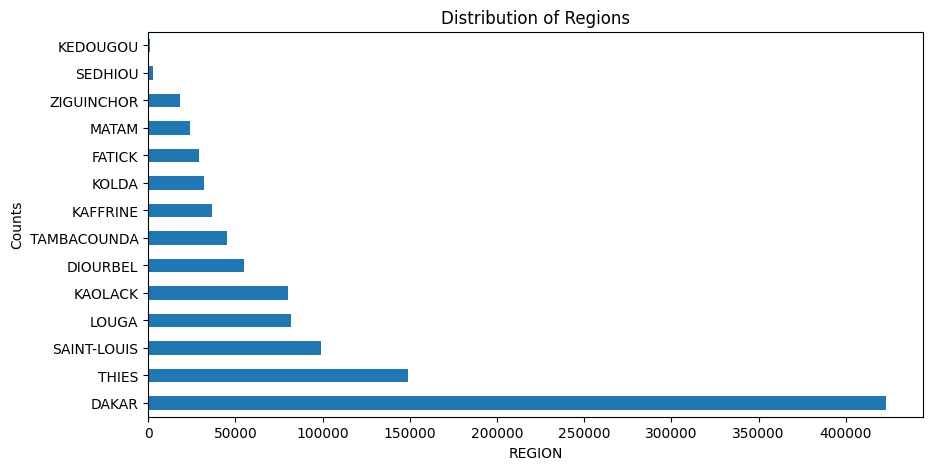

In [39]:
# Count the number eacch region in the 'REGION' column
region_counts = train['REGION'].value_counts()
print(region_counts)

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
region_counts.plot(kind='barh')
plt.ylabel('Counts')
plt.xlabel('REGION')
plt.title('Distribution of Regions')
plt.show()


>- The image above shows that most customers are located in Dakar with over 400,000 customers. Next are Thies and Saint Loius with about 150,000 and 100,000 customers respetively.

### 4. What is the churn distribution of the customers?

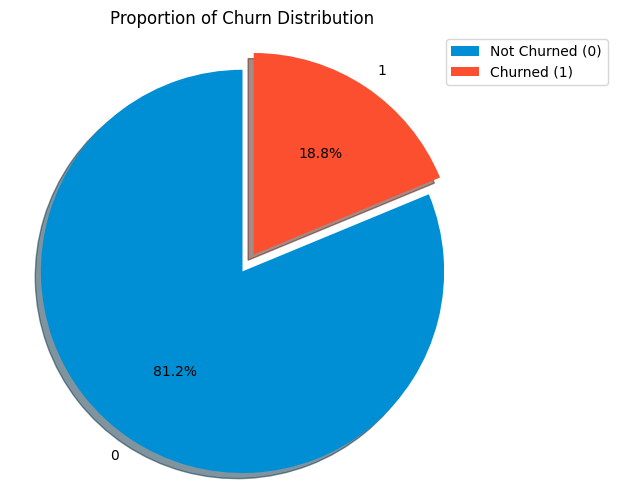

In [40]:

# Count the number of unique values in the "CHURN" column
churn_dist = train['CHURN'].value_counts()

# Plot the proportion of churn distribution using a pie chart
labels = churn_dist.index
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
plt.figure(figsize=(6, 6))
plt.pie(churn_dist, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

# Add custom legend labels
legend_labels = ['Not Churned (0)', 'Churned (1)']
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Proportion of Churn Distribution')
plt.ylabel('')
plt.show()


>- Customers that churned is 18.8%, while customer that did not churn is 81.2%. From this chart, we can deduce that the target variable, "CHURN" is highly imbalanced. For our Modelling we would have to balance this vasriable in order to avoid overfitting and a possible bias.

### 5. What tennure has the highest number of subscribers?

In [41]:
# Count the levels in the 'TENURE' categorical feature
tenure_counts = train['TENURE'].value_counts()

# Create an interactive horizontal bar chart
fig = px.bar(tenure_counts, y=tenure_counts.index, x='TENURE', orientation='h',
             title='Distribution of Tenure of Customers', labels={'TENURE': 'Counts', 'index': 'TENURE'})

# Customize the colors of the bars
color_sequence = px.colors.qualitative.Plotly
fig.update_traces(marker_color=color_sequence)

# Show the interactive chart
fig.show()


>- The tenure with the highest number of customers is the group that has spent more than 24 months on the network with over 1 million subscribers

### 6. Do customers with high income make the most top-ups?

In [42]:
# Create an interactive scatter plot with color-coded churn status
fig = px.scatter(train, x='REVENUE', y='MONTANT', color='CHURN',
                 color_continuous_scale='Viridis', opacity=0.7,
                 labels={'REVENUE': 'Income', 'MONTANT': 'Top-up Amount'},
                 title='Income vs. Top-up Amount by Churn Status')
fig.update_coloraxes(colorbar_title='Churn Status (0: Not Churned, 1: Churned)')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

>- By examining the scatter plot, you can visually assess whether customers with higher income tend to make the most top-ups and whether there is any noticeable difference in top-up behavior between churned and non-churned customers.

### 7. What Region makes the most top-ups?

In [43]:

# Group the data by 'REGION' and calculate the total top-up amount for each region
top_up_by_region = train.groupby('REGION')['MONTANT'].sum().reset_index()

# Create an interactive bar chart with region on the y-axis
fig = px.bar(top_up_by_region, y='REGION', x='MONTANT', orientation='h',
             labels={'MONTANT': 'Total Top-up Amount', 'REGION': 'Region'},
             title='Total Top-up Amount by Region')
fig.update_xaxes(title_text='Total Top-up Amount')
fig.update_yaxes(categoryorder='total ascending')

fig.show()

>- The plot indicates that the reion with the most top-up amount is Dakar, which has over 2 Billion in top-up amount

### 8. Which network has the most interactions/transactions?

In [44]:
# Calculate the total number of interactions/transactions for each network
network_interactions = train[['ON_NET', 'ORANGE', 'TIGO']].sum().reset_index()
network_interactions.columns = ['Network', 'Total Interactions/Transactions']

# Create an interactive bar chart using Plotly Express
fig = px.bar(network_interactions, x='Network', y='Total Interactions/Transactions',
             color='Network', color_discrete_map={'ON_NET': 'skyblue', 'ORANGE': 'orange', 'TIGO': 'lightgreen'},
             labels={'Total Interactions/Transactions': 'Total Interactions/Transactions'},
             title='Total Interactions/Transactions by Network')
fig.update_xaxes(title_text='Network')
fig.update_yaxes(title_text='Total Interactions/Transactions')

fig.show()

>- Observing the image, we can conclude that the network with the highest nuumber of transactions are the on_net (inter expresso) calls

### 9. Which location has the highest number of network transactions?

<Figure size 1200x600 with 0 Axes>

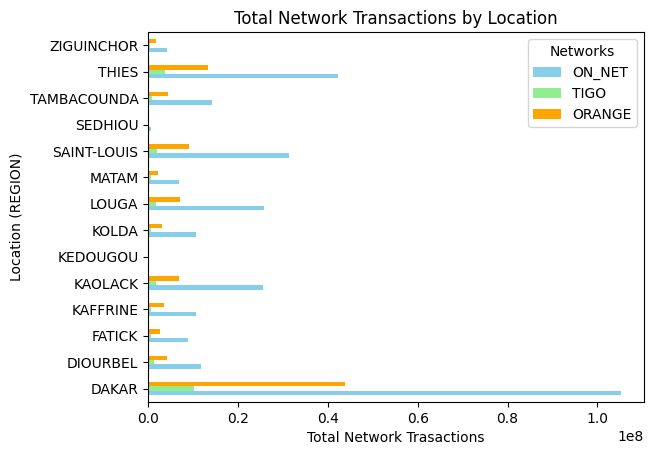

In [45]:
# Calculate the total number of subscribers for that have transactions with each network (ON_NET, TIGO, ORANGE) in each location (REGION)
location_network_subscribers = train.groupby('REGION')[['ON_NET', 'TIGO', 'ORANGE']].sum()

# Create a bar chart to visualize the total network transactions by location
plt.figure(figsize=(12, 6))
location_network_subscribers.plot(kind='barh', stacked=False,
                                 color=['skyblue', 'lightgreen', 'orange'])
plt.xlabel('Total Network Trasactions')
plt.ylabel('Location (REGION)')
plt.title('Total Network Transactions by Location')
plt.xticks(rotation=0)
plt.grid(axis='x', linestyle='', alpha=0.7)

plt.legend(['ON_NET', 'TIGO', 'ORANGE'], title='Networks', loc='upper right')
plt.show()

>- Considering the region with the highest network transactions, Dakar appears to have had more transactions on all three networks than any other region, with on_net transactions remaining the highest, and not just for Dakar, but for all the other regions aswell

### 10. Which month/tenure has the highest amount of top-up?

In [46]:
# Group the data by 'TENURE' and calculate the total top-up amount
topup_by_tenure = train.groupby('TENURE')['MONTANT'].sum().reset_index()

# Create an interactive horizontal bar chart using Plotly Express
fig = px.bar(topup_by_tenure, x='MONTANT', y='TENURE',
             orientation='h', color='TENURE',
             title='Total Top-up Amount by Tenure',
             labels={'TENURE': 'Tenure (Months)', 'MONTANT': 'Total Top-up Amount'},
             color_continuous_scale='skyblue')

fig.update_xaxes(title_text='Total Top-up Amount')
fig.update_yaxes(categoryorder='total ascending')

fig.show()

>- The above plot helps us understand what group of subscribers are making contributing the most top-up amounts. From the plot, we can see the subsccribers who spend more than 24 months on the network contribute the most top-up amounts

# Bivariate Analysis

### 11. How many customers make on-net calls and off-net calls?

In [47]:
# Calculate the count of customers making on-net (Inter Expresso) calls
on_net_count = len(train[train['ON_NET'] > 0])

# Calculate the count of customers making off-net calls (calls to Tigo or Orange)
off_net_count = len(train[(train['ORANGE'] > 0) + (train['TIGO'] > 0)])

# Create a DataFrame for visualization
data = pd.DataFrame({'Call Type': ['On-Net (Inter Expresso) Calls', 'Off-Net (Tigo/Orange) Calls'],
                     'Number of Customers': [on_net_count, off_net_count]})

# Create an interactive bar chart using Plotly Express
fig = px.bar(data, x='Call Type', y='Number of Customers',
             title='Number of Customers Making On-Net vs. Off-Net (Tigo/Orange) Calls',
             labels={'Call Type': 'Call Type', 'Number of Customers': 'Number of Customers'},
             color='Call Type')

fig.show()

>- Observing the plot, customers made more off-net (tigo and orange) calls than they did for on_net calls

### 12. What is the ratio of calls customers made to Orange and Tigo?

In [48]:
# Calculate the total calls to Orange and Tigo
total_orange_calls = train['ORANGE'].sum()
total_tigo_calls = train['TIGO'].sum()

# Calculate the ratio of calls to Orange to calls to Tigo
call_ratio = total_orange_calls / total_tigo_calls

# Display the ratio
print(f"Ratio of calls to Orange to calls to Tigo: {call_ratio:.2f}")

Ratio of calls to Orange to calls to Tigo: 4.12


>- For every 1 call made to the Tigo network, there were approximately 4.12 calls made to the Orange network.
The Orange network had significantly more calls compared to the Tigo network in the dataset.

### 13. What is the churn distribution by Expresso, Tigo, and Orange?

In [49]:
# Create a DataFrame for churn distribution by network
churn_distribution = train[['ON_NET', 'ORANGE', 'TIGO', 'CHURN']]

# Calculate the total number of customers for each network who churned and who did not
churn_counts = churn_distribution.groupby('CHURN').sum()

# Transpose the DataFrame for better visualization
churn_counts = churn_counts.T.reset_index()

# Create an interactive bar chart using Plotly Express
fig = px.bar(churn_counts, x='index', y=[0, 1], title='Churn Distribution by Network (Expresso, Tigo, Orange)',
             labels={'index': 'Network', '0': 'Not Churned', '1': 'Churned'},
             color_discrete_map={0: 'lightgreen', 1: 'skyblue'})

fig.update_layout(xaxis_title='Network', yaxis_title='Value of Call Transactions',
                  legend_title='Churn', xaxis={'categoryorder': 'trace'})

fig.show()

>- Here, we observe the distribution of the transactions that churned and did not churn for all three networks. On_net (expresso) transactions had the highest value of that churned, whille Tigo had the lowest transaction value which churned.

### 14. Which customers churned by top-up amount and income?

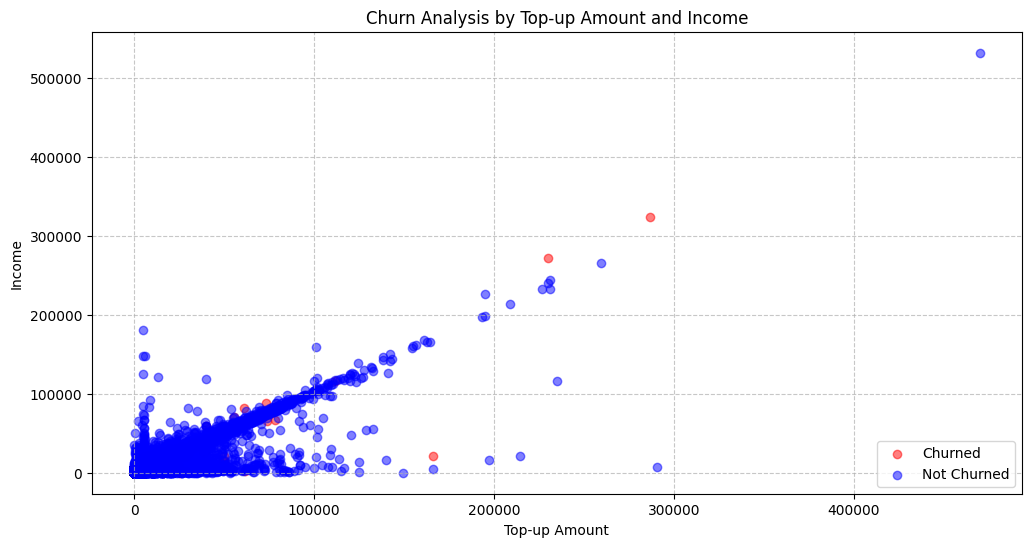

In [50]:
# Create scatter plots for top-up amount vs. income, color-coded by churn status
plt.figure(figsize=(12, 6))

# Scatter plot for churned customers (CHURN == 1)
plt.scatter(
    train[train['CHURN'] == 1]['MONTANT'],
    train[train['CHURN'] == 1]['REVENUE'],
    color='red',
    alpha=0.5,
    label='Churned'
)

# Scatter plot for non-churned customers (CHURN == 0)
plt.scatter(
    train[train['CHURN'] == 0]['MONTANT'],
    train[train['CHURN'] == 0]['REVENUE'],
    color='blue',
    alpha=0.5,
    label='Not Churned'
)

plt.xlabel('Top-up Amount')
plt.ylabel('Income')
plt.title('Churn Analysis by Top-up Amount and Income')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')

plt.show()

>- Observing the satterplot, most of the customers who did not churn have made contributed a top-up amount of less than 100,000. Cstomers who have high top-up amounts ranging 200,000 to 300,000 had more customers who did not churn, while only a few of them churned. Also an outlier who did not churn happens to have the highest top-up amount.

### 15. Which location has the highest number of top earners?

In [51]:
# Filter the dataset to include only top earners
top_earners = train[train['REVENUE'].notnull()]

# Group the data by 'REGION' and count the number of top earners in each region
top_earners_by_region = top_earners.groupby('REGION')['user_id'].count().reset_index()

# Find the location with the highest number of top earners
location_with_highest_top_earners = top_earners_by_region.loc[top_earners_by_region['user_id'].idxmax(), 'REGION']

# Get the count of top earners in the location with the highest count
highest_top_earners_count = top_earners_by_region['user_id'].max()

# Find the location with the lowest number of top earners
location_with_lowest_top_earners = top_earners_by_region.loc[top_earners_by_region['user_id'].idxmin(), 'REGION']

# Get the count of top earners in the location with the lowest count
lowest_top_earners_count = top_earners_by_region['user_id'].min()

# Create an interactive bar chart using Plotly Express
fig = px.bar(top_earners_by_region, x='REGION', y='user_id',
             title='Number of Top Earners by Location',
             labels={'user_id': 'Number of Top Earners'},
             hover_data=['REGION', 'user_id'])  # Display REGION and user_id on hover

fig.update_xaxes(categoryorder='total descending')
fig.update_layout(xaxis_title='Location (REGION)', yaxis_title='Number of Top Earners')

# Annotate the location with the highest number of top earners
fig.add_annotation(text=f'Highest: {location_with_highest_top_earners} ({highest_top_earners_count})',
                   x=location_with_highest_top_earners, y=highest_top_earners_count + 10,
                   showarrow=True, arrowhead=1)

# Annotate the location with the lowest number of top earners
fig.add_annotation(text=f'Lowest: {location_with_lowest_top_earners} ({lowest_top_earners_count})',
                   x=location_with_lowest_top_earners, y=lowest_top_earners_count - 10,
                   showarrow=True, arrowhead=1)

fig.show()

>- A lot of top earners are located in the Capital, Dakar. The number of tope earners is 422671, which is almost 50% of the total customers. We can also see that the lowest earners are located in the Kedougou Region.

### 16. What is the highest amount of active users for 90 days?

In [52]:
# Calculate the highest amount of active users for 90 days
highest_active_users = train['REGULARITY'].max()

print(f"The highest amount of active users for 90 days is {highest_active_users}.")

The highest amount of active users for 90 days is 62.


# Multivariate Analysis

### 17. What is the relationship between network interactions and customer churn?

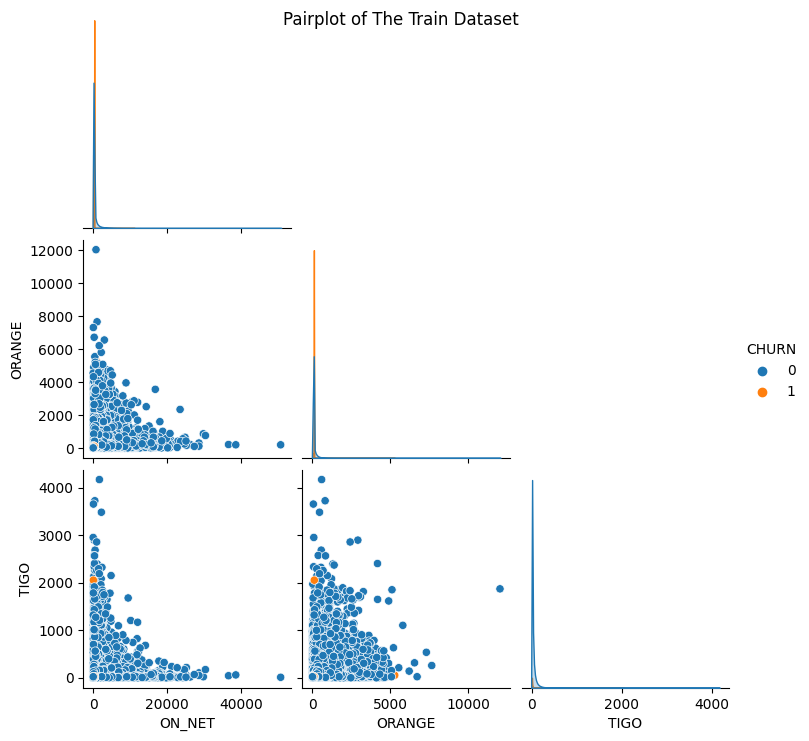

In [53]:
# select relevant columns for pair plot
columns = ['ON_NET', 'ORANGE', 'TIGO', 'CHURN']

# create pair plot using seaborn
sns.pairplot(train[columns], hue='CHURN', corner=True)

# Add title to plot
plt.suptitle('Pairplot of The Train Dataset', fontsize=12)

plt.show()


>- Overall, this pair plot allows us to visually explore whether there are any noticeable differences in network interactions between customers who stayed with the telecom service and those who churned.

#### 18. What is the relationship between top-up amount, refill and customer income?

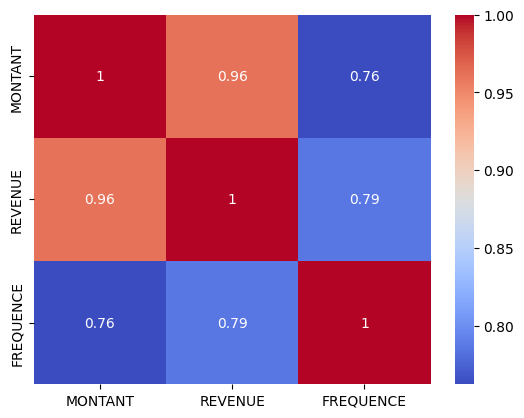

In [54]:
# Create a heatmap of correlations between numeric variables
corr = train[['MONTANT', 'REVENUE', 'FREQUENCE']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

>- The heatmap shows a strong correlation between customers revenue and monthly top-up amount.

#### 19. How does the top-up amount affect the top packages and their churn rate?

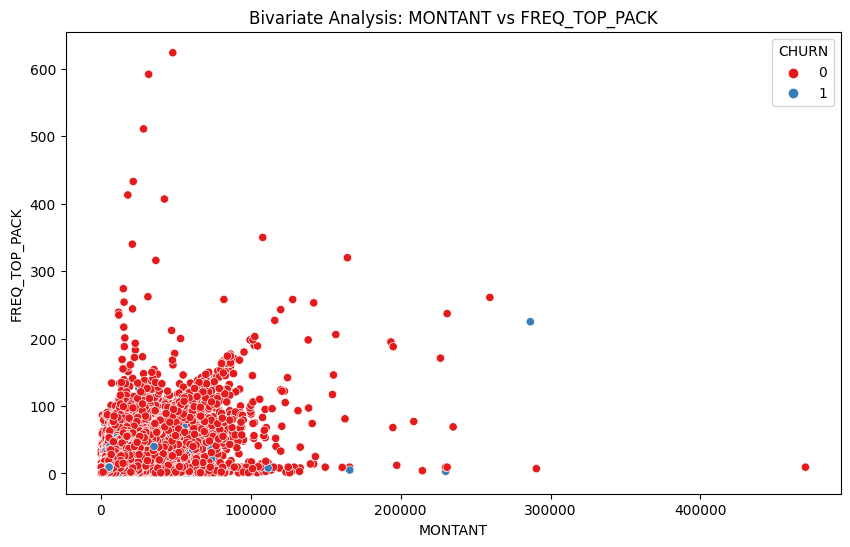

In [55]:
# Create a scatter plot using Seaborn with different colors based on 'CHURN'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='MONTANT', y='FREQ_TOP_PACK', hue='CHURN', palette='Set1')
plt.title('Bivariate Analysis: MONTANT vs FREQ_TOP_PACK')
plt.xlabel('MONTANT')
plt.ylabel('FREQ_TOP_PACK')
plt.legend(title='CHURN')
plt.show()

>- The scatterplot indicates that customers who make a frequent top-up of the top pacckeges are less likely to churn, while packages with less top-up frequency are more likely to churn.

#### 20. What is the relationship between 'CHURN,' 'TENURE,' and 'REVENUE.''?

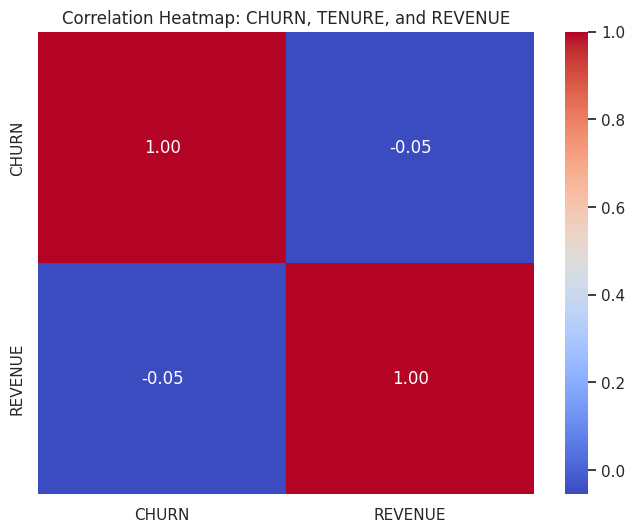

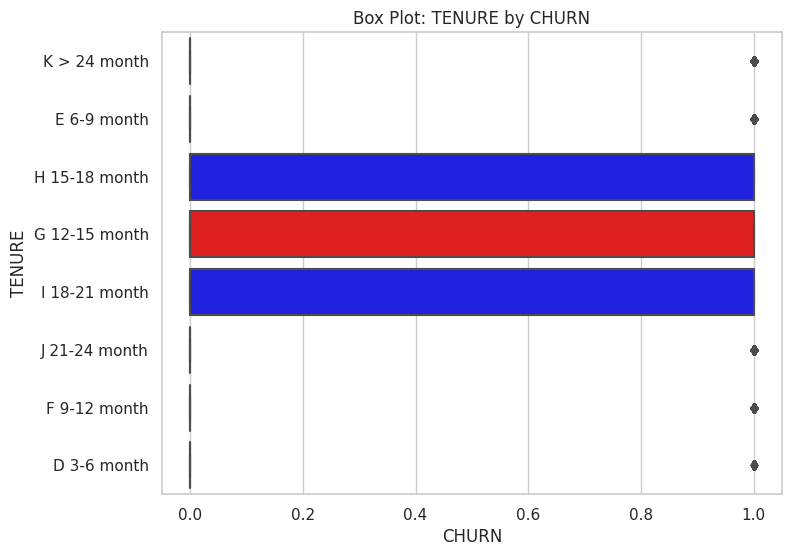

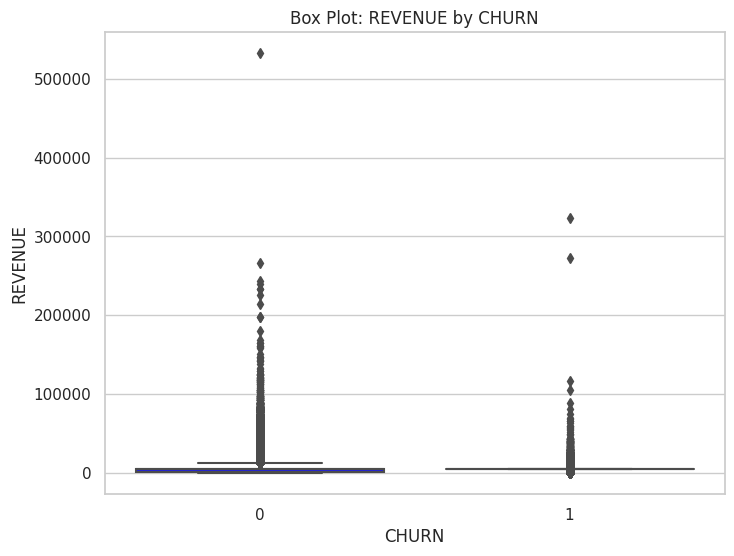

In [56]:
# Select the relevant columns for analysis
columns_to_analyze = ['CHURN', 'TENURE', 'REVENUE']

# Create a DataFrame with the selected columns
data_to_analyze = train[columns_to_analyze]

# Create a heatmap to visualize correlations
corr = data_to_analyze.corr()
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: CHURN, TENURE, and REVENUE')
plt.show()

# Create box plots to analyze 'TENURE' and 'REVENUE' by 'CHURN'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_to_analyze, x='CHURN', y='TENURE', palette=['blue', 'red'])
plt.title('Box Plot: TENURE by CHURN')
plt.xlabel('CHURN')
plt.ylabel('TENURE')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_to_analyze, x='CHURN', y='REVENUE', palette=['blue', 'red'])
plt.title('Box Plot: REVENUE by CHURN')
plt.xlabel('CHURN')
plt.ylabel('REVENUE')
plt.show()


>- The above set of plots decribes the relationship between between churn, trnre ad revenuue. The visuals suggests there is a weak correlation between revenue and churn. in essence the revenue of the customer does not necessarily influence the decision stop using the network.
Secondly, the customers who churn stay on the network between 15 to 21 months before churning.
Lastly, customers who eventually churn, make a monthly income of 100,000 or less.

In [57]:
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)

In [58]:
# train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) #drop these columns

# **Machine Learning**

In [59]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## **Feature Engineering**

### **Feature Selection**

In [60]:
drop =['user_id', 'CHURN', 'REGION', 'MRG', 'TOP_PACK']
y=train['CHURN']
x=train.drop(columns=drop, axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

print(X_train.shape)
print(y_train.shape)

(861619, 14)
(861619,)


### **Splitting Dataset**

In [61]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)

xt= X_train
yt= y_train

### **Standize Numeric Columns**

In [62]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK']
      #  'ZONE1', 'ZONE2',

In [63]:
scaler = StandardScaler()

In [64]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [65]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
150386,K > 24 month,-0.935354,-0.985594,-0.914569,-0.914574,-1.084464,-0.251960,-0.385694,0.000630,-0.000364,8.167483,7.709844,-0.809852,-0.000702
937039,K > 24 month,0.000396,-0.000473,0.000549,0.000549,-0.000091,-0.000008,-0.001131,0.000630,-0.000364,8.167483,7.709844,-1.034170,-0.000702
1075206,K > 24 month,-0.004733,-0.143110,-0.000491,-0.000666,-0.248688,-0.000008,-0.001131,0.226162,-0.524613,8.167483,7.709844,-0.675261,0.078700
449901,K > 24 month,0.258650,0.231327,0.257528,0.257354,0.002045,-0.169472,0.021643,2.077583,2.182949,8.167483,7.709844,0.625783,0.509321
861349,K > 24 month,0.000396,-0.000473,0.000549,0.000549,-0.000091,-0.000008,-0.001131,0.000630,-0.000364,8.167483,7.709844,-0.181761,-0.000702


In [66]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [67]:
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [68]:
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
588361,K > 24 month,0.085519,-0.517548,0.088095,0.088093,-0.499421,-0.296104,-0.139862,-0.498870,-0.000364,2.000000,7.709844,1.343601,-0.782541
701224,K > 24 month,1.522889,1.448248,1.668036,1.668208,1.422865,-0.361836,-0.204179,0.213215,5.486673,8.167483,7.709844,1.253874,2.016493
42830,K > 24 month,-0.786103,-0.611157,-0.766122,-0.765954,-0.666576,-0.359258,-0.385694,-0.583026,-0.574293,8.167483,7.709844,-0.495807,-0.782541
865423,K > 24 month,-0.794883,-0.891985,-0.602710,-0.602885,-0.750154,-0.000008,0.077384,-0.265824,-0.000364,8.167483,7.709844,0.311738,-0.782541
214852,K > 24 month,-0.320793,-0.143110,-0.224797,-0.224628,0.419933,0.613837,-0.385694,-0.583026,-0.474933,8.167483,7.709844,1.164146,-0.244266


### **Encode the Tenure Column**

In [69]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [70]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [71]:
X_val['TENURE'] = encoder.transform(X_val["TENURE"])

In [72]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
150386,7,-0.935354,-0.985594,-0.914569,-0.914574,-1.084464,-0.251960,-0.385694,0.000630,-0.000364,8.167483,7.709844,-0.809852,-0.000702
937039,7,0.000396,-0.000473,0.000549,0.000549,-0.000091,-0.000008,-0.001131,0.000630,-0.000364,8.167483,7.709844,-1.034170,-0.000702
1075206,7,-0.004733,-0.143110,-0.000491,-0.000666,-0.248688,-0.000008,-0.001131,0.226162,-0.524613,8.167483,7.709844,-0.675261,0.078700
449901,7,0.258650,0.231327,0.257528,0.257354,0.002045,-0.169472,0.021643,2.077583,2.182949,8.167483,7.709844,0.625783,0.509321
861349,7,0.000396,-0.000473,0.000549,0.000549,-0.000091,-0.000008,-0.001131,0.000630,-0.000364,8.167483,7.709844,-0.181761,-0.000702


In [73]:
# Due to high number of missing data in Zone 1 and Zone 2 their column would be dropped

X_train.drop(columns=['ZONE1', 'ZONE2'], inplace=True)
X_test.drop(columns=['ZONE1', 'ZONE2'], inplace=True)
X_val.drop(columns=['ZONE1', 'ZONE2'], inplace=True)

### **Checking unbalance dataset**

Text(0.5, 0, 'Churn')

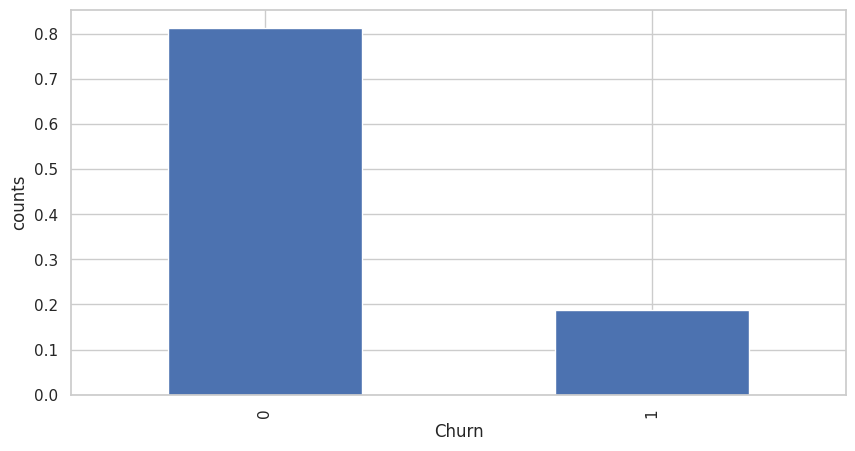

In [74]:
y_train.value_counts()
plt.figure(figsize=(10,5))
y_train.value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

### **Balancing Dataset**

In [75]:
x_train_randOverSample = X_train.copy()
y_train_randOverSample = y_train.copy()


randOverSample = RandomOverSampler(random_state=100,)
X_train_randOverSample, y_train_randOverSample = randOverSample.fit_resample(x_train_randOverSample, y_train_randOverSample.ravel())

In [76]:
y_train_randOverSample


array([0, 0, 0, ..., 1, 1, 1])

Text(0.5, 0, 'Churn')

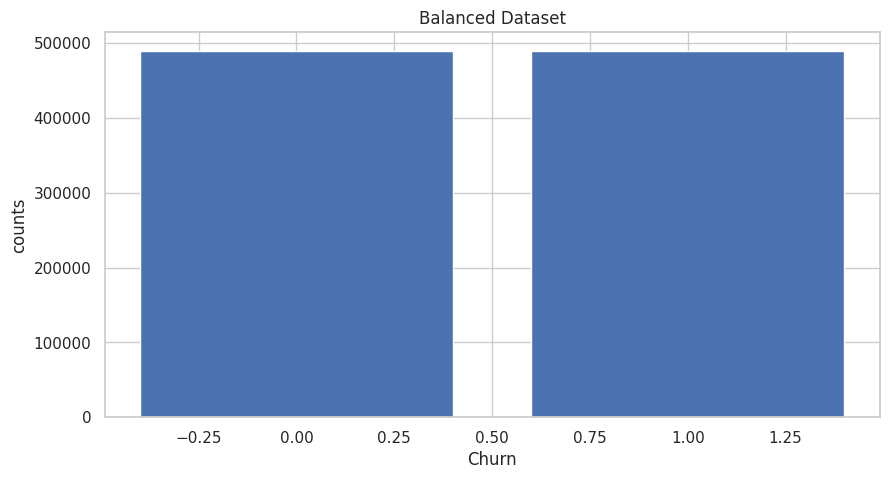

In [77]:
values,count=np.unique(y_train_randOverSample,return_counts=True)
plt.figure(figsize=(10,5))
plt.bar(values,count)
plt.title("Balanced Dataset")
plt.ylabel('counts')
plt.xlabel('Churn')



## Creating Models

In [78]:
last_models_metrics = []

In [79]:

classifiers = [('LR', LogisticRegression()),
                   ("DT", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),

                   ]

for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X_train_randOverSample, y_train_randOverSample, cv=3, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
        accuracy = round(cv_results['test_accuracy'].mean(), 4)
        auc = round(cv_results['test_roc_auc'].mean(), 4)
        recall = round(cv_results['test_recall'].mean(), 4)
        precision = round(cv_results['test_precision'].mean(), 4)
        f1 = round(cv_results['test_f1'].mean(), 4)

        last_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
          })

        print(f"########## {name} ##########")
        print(f"Accuracy: {accuracy}")
        print(f"AUC: {auc}")
        print(f"Recall: {recall}")
        print(f"Precision: {precision}")
        print(f"F1: {f1}")


########## LR ##########
Accuracy: 0.8216
AUC: 0.894
Recall: 0.8935
Precision: 0.7812
F1: 0.8336
########## DT ##########
Accuracy: 0.8806
AUC: 0.9086
Recall: 0.9709
Precision: 0.8224
F1: 0.8905
########## RF ##########
Accuracy: 0.8973
AUC: 0.9484
Recall: 0.9723
Precision: 0.8456
F1: 0.9045
########## GBM ##########
Accuracy: 0.8282
AUC: 0.9018
Recall: 0.8668
Precision: 0.8046
F1: 0.8346
########## XGBoost ##########
Accuracy: 0.8327
AUC: 0.9072
Recall: 0.8743
Precision: 0.8071
F1: 0.8393


In [80]:
metrics = {
    "Model": ["LR", "DT", "RF", "LightGBM", "XGB", ],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], ],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], ],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'],],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'],],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], ]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

### **Feature Importance**

In [81]:
models = [RandomForestClassifier(),
              XGBClassifier(),
            DecisionTreeClassifier()


              ]

In [82]:
def plot_importance(model, features, num=len(X_train_randOverSample), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')

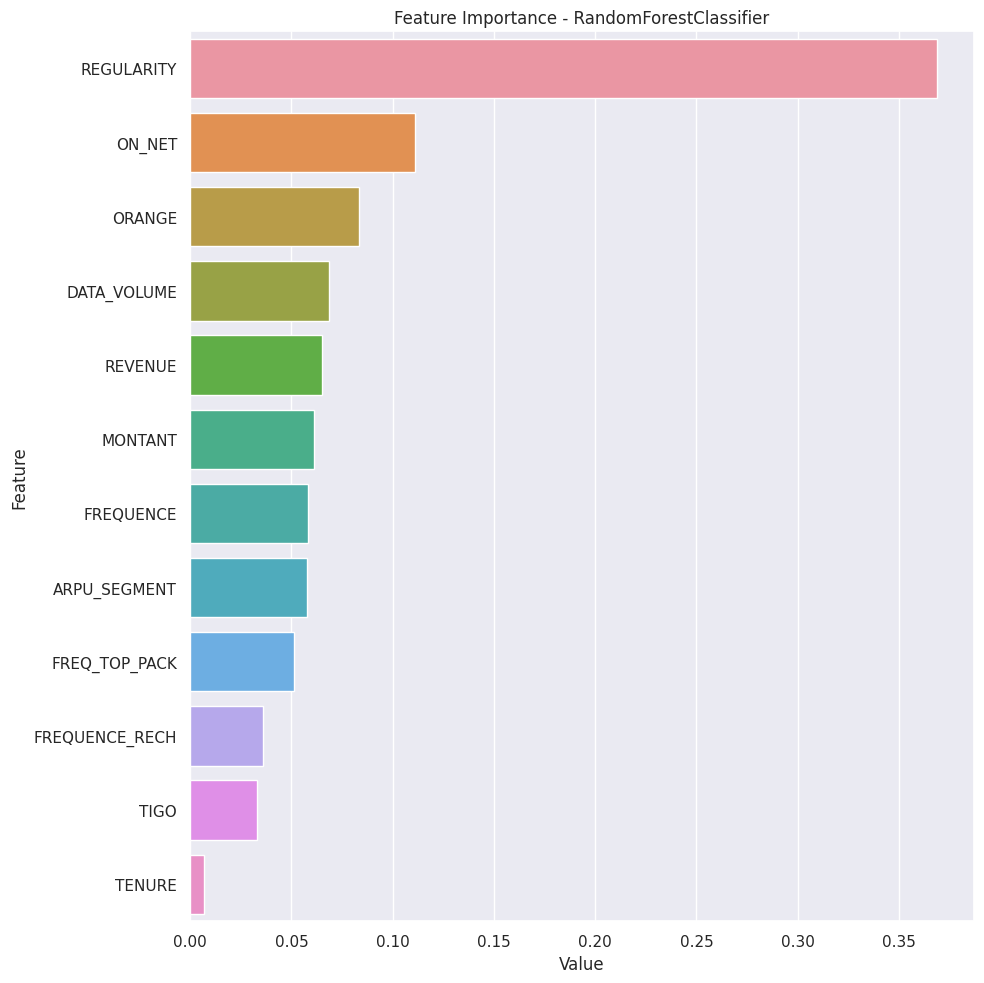

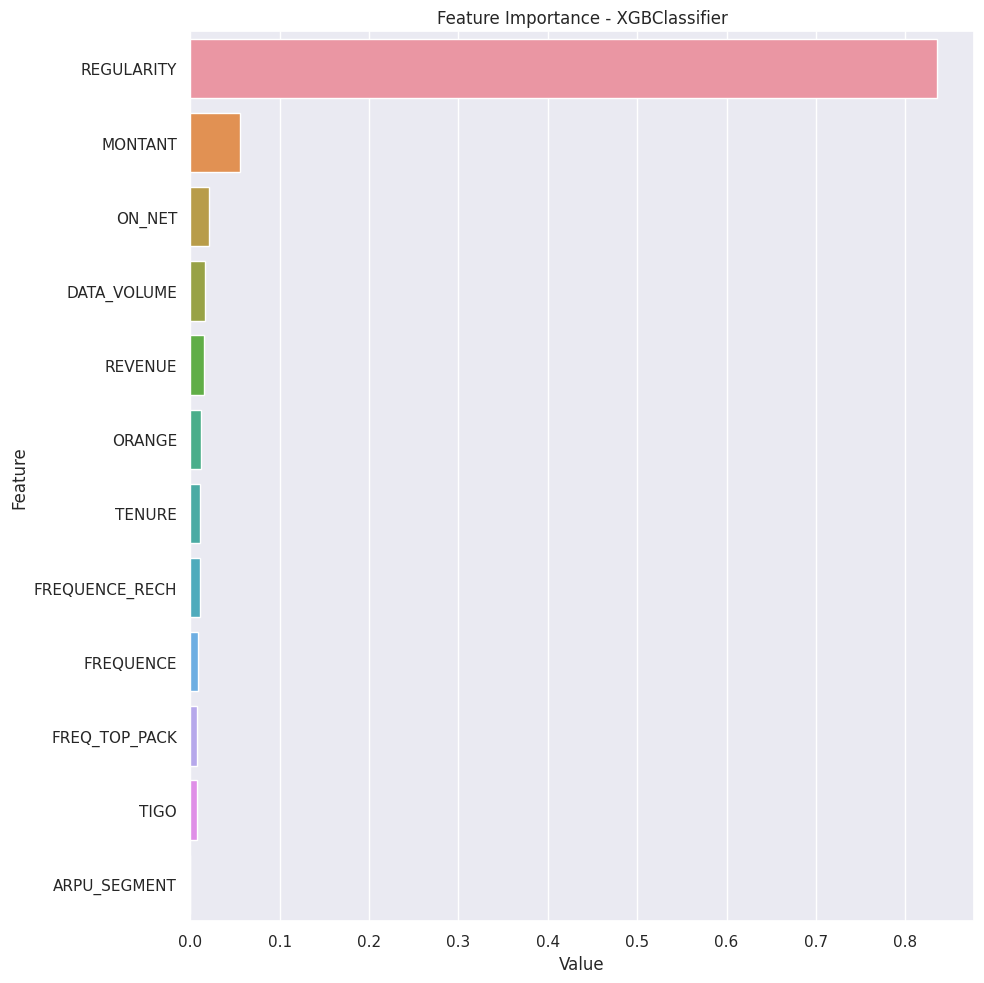

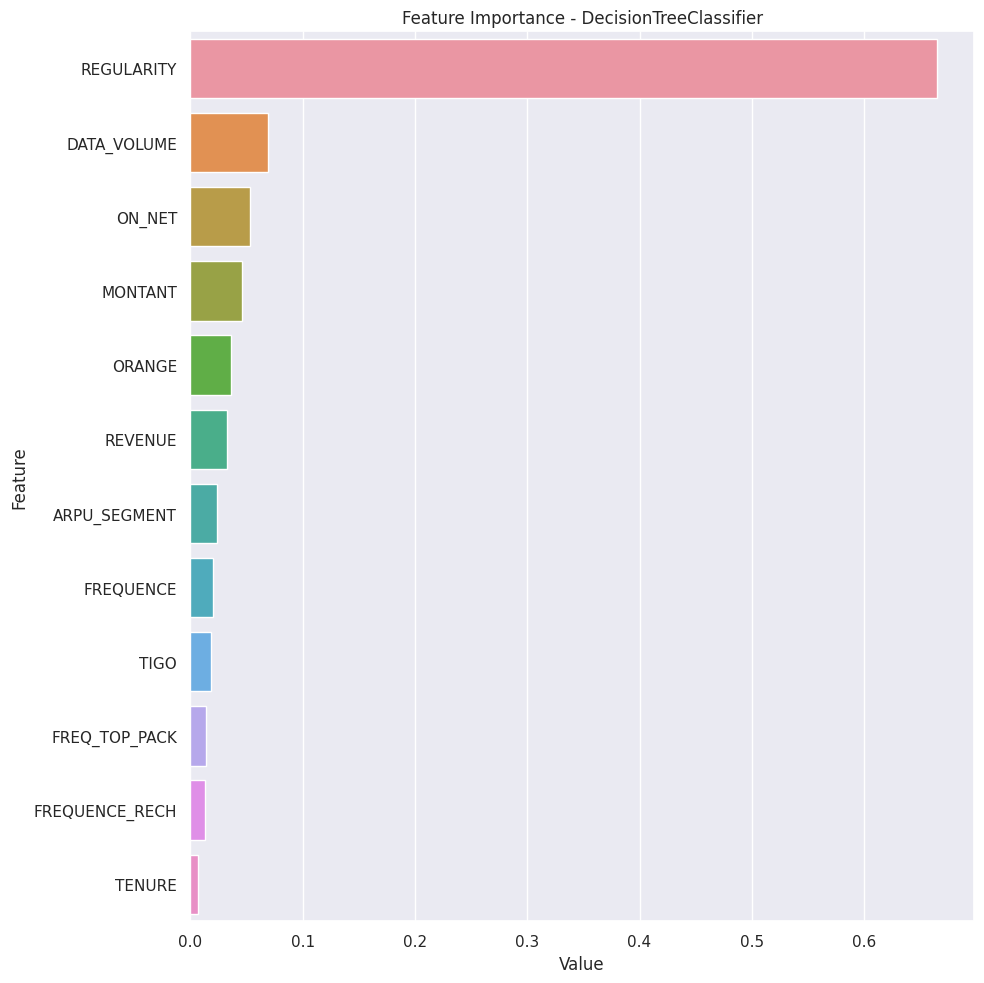

In [83]:
for model in models:
    model.fit(X_train_randOverSample, y_train_randOverSample)
    plot_importance(model, X_train_randOverSample)

### **Hyperparameter Optimization**

In [84]:
lr_params = {"C": [0.001, 0.01, 0.1, 1, 10 ]}
knn_params = {"n_neighbors": [3, 5]}
dt_params = {"max_depth": [3, 5, 7]}
rf_params = {"n_estimators": [10]}
xgb_params = {"learning_rate": [0.01, 0.1], "max_depth": [3]}


In [85]:
classifiers = [
    ("LR", LogisticRegression(), lr_params),

    ("DT", DecisionTreeClassifier(), dt_params),
    ("RF", RandomForestClassifier(), rf_params),
     ("XGB", XGBClassifier(), xgb_params)
    ]

In [88]:
def hyperparameters_optimization(X_train_randOverSample, y_train_randOverSample, cv=5, scoring="f1"):
    print("Hyperparameter Optimimization")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} #########")
        # cv_results = cross_validate(classifier, X_train_randOverSample, y_train_randOverSample, cv=cv, scoring=scoring)
        # print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X_train_randOverSample,y_train_randOverSample)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X_train_randOverSample, y_train_randOverSample, cv=cv, scoring=scoring)
        print(f"{scoring} (After) : {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [89]:
best_models = hyperparameters_optimization(X_train_randOverSample, y_train_randOverSample)

Hyperparameter Optimimization
########## LR #########
f1 (After) : 0.8336
LR best params: {'C': 10}

########## DT #########
f1 (After) : 0.8348
DT best params: {'max_depth': 7}

########## RF #########
f1 (After) : 0.9047
RF best params: {'n_estimators': 10}

########## XGB #########
f1 (After) : 0.8342
XGB best params: {'learning_rate': 0.1, 'max_depth': 3}



### **Final Model**

Based on the above result ,Random Forest would be selected as the final model

In [90]:
best_models['RF']

RandomForestClassifier(n_estimators=10)

In [92]:
RF_model = best_models['RF'].fit(X_train_randOverSample, y_train_randOverSample)

In [93]:
# Prediction with Trained Model

y_pred = RF_model.predict(X_test)
y_prob = RF_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88    174967
           1       0.52      0.79      0.63     40438

    accuracy                           0.82    215405
   macro avg       0.73      0.81      0.76    215405
weighted avg       0.87      0.82      0.84    215405



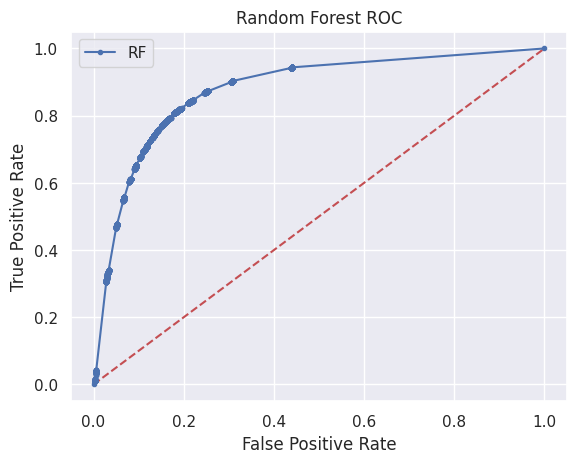

In [94]:
RF_roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, marker='.', label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest ROC")
plt.legend()
plt.show()

### **Saving Model**

In [95]:


 joblib.dump(best_models['RF'], 'best_model_filename.pkl')

['best_model_filename.pkl']